In [60]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [109]:
df=pd.read_csv("../output/FINAL/dataset.pca.60.csv")
# df.query('uuid=="fec8ed36-230c-470a-b89d-983d380a9bc6"')
df

,uuid,cancer_type,dataset,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,...,pca_50,pca_51,pca_52,pca_53,pca_54,pca_55,pca_56,pca_57,pca_58,pca_59
0,0180b8ef-dbca-4edd-bce1-3f793f354f13,bladder,Train,51341.149046,224.332085,6284.131631,-791.275314,4221.665014,11298.487282,-1097.097804,...,-4760.828236,1338.107140,-301.895746,1460.898447,-533.414034,771.326745,14.096859,-489.513635,374.709250,-1087.102377
1,01d381c7-6398-47cb-925c-078cd538852f,bladder,Validation,-24713.227977,-4937.493520,-8576.115927,6380.664917,953.620223,265.173635,-11147.398920,...,-544.957383,-853.258191,1115.313101,-423.365952,713.141917,-476.924797,-5879.356001,373.075417,-152.409310,410.479902
2,0240ae8f-9354-4123-b791-5333317ae9f0,bladder,Train,-41222.406099,-2691.464414,-1066.245282,-6521.645631,631.176632,-687.979052,2562.847278,...,1368.377020,1454.780030,-1284.603736,1254.236279,-1282.694716,-1252.613858,-918.127351,-790.156701,-203.156907,-663.137157
3,047dc5b6-c15e-4dad-b753-de55ca6e171c,bladder,Train,-48630.249914,2795.951791,21682.475207,3069.687377,-1976.292654,404.694296,8331.884970,...,191.328683,1298.657334,-583.302459,2693.377669,-743.301938,-190.797584,-421.069083,161.733526,538.529883,-1171.735144
4,048da4d7-cab0-49c5-8bc9-78b1bf0b365b,bladder,Train,-8188.487975,-6644.862627,-5120.646124,6206.666494,1472.085506,-4704.178776,1028.238671,...,-2720.961626,-1392.612204,1617.116272,-1067.813277,403.260643,761.699692,908.205828,485.888415,201.592503,864.248479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8793,fec8ed36-230c-470a-b89d-983d380a9bc6,thyroid_gland,Train,22775.604324,126613.379587,-58377.048166,14801.533869,-3122.715241,1773.130783,20751.737010,...,-2125.398842,3548.079981,-1627.844317,226.141126,1926.577998,1037.868628,-426.213716,-54.269960,-416.709332,1257.933106
8794,fed1f0b5-cd64-46e2-94b8-f15a8d50b78d,thyroid_gland,Train,-20121.285121,-4740.666809,-5353.612476,-4187.550328,2562.437862,2152.625662,1486.284054,...,-754.198023,-570.454567,588.555176,-371.121243,-902.630199,34.993176,-428.058787,-264.649004,419.573301,-88.210592
8795,ff4acef6-2a13-4004-8c19-9ecf6f022517,thyroid_gland,Train,28446.340043,-3592.100962,2922.506890,11184.886113,-7427.172762,-312.903380,-8800.618261,...,549.957030,-1044.445641,1251.699519,-373.646958,1569.769407,273.826270,-2798.552812,-203.466143,-174.150207,-201.538088
8796,ff67dabb-3dfc-4e47-8d92-3a76bbbdebc6,thyroid_gland,Validation,48650.979925,-4110.103366,11696.670366,37482.901360,-215.683692,12918.507041,-3999.327437,...,95.320380,-1840.221399,1644.799249,-303.037580,-1673.213745,2295.635136,46.198070,2506.474180,-796.929311,1844.208189


In [106]:
df=pd.read_csv("../output/FINAL/dataset.out.60.csv")
df.query('uuid=="fec8ed36-230c-470a-b89d-983d380a9bc6"')

,uuid,dataset,cancer_type,logreg_prediction
3473,fec8ed36-230c-470a-b89d-983d380a9bc6,Train,thyroid_gland,thyroid_gland


In [112]:
Xtrain = df.query('dataset=="Train"').drop(columns=["uuid","cancer_type","dataset"])
ytrain = df.query('dataset=="Train"')["cancer_type"]

Xvalidation = df.query('dataset=="Validation"').drop(columns=["uuid","cancer_type","dataset"])
yvalidation = df.query('dataset=="Validation"')["cancer_type"]

In [65]:
nns=[]
scores=[]
for nn in range(1,200,5):
    mm = MinMaxScaler()
    mm.fit()
    knn=KNeighborsClassifier(n_neighbors=nn)
    knn.fit(Xtrain, ytrain)
    nns.append(nn)
    scores.append(knn.score(Xvalidation, yvalidation))

TypeError: MinMaxScaler.fit() missing 1 required positional argument: 'X'

In [66]:
import matplotlib.pyplot as plt

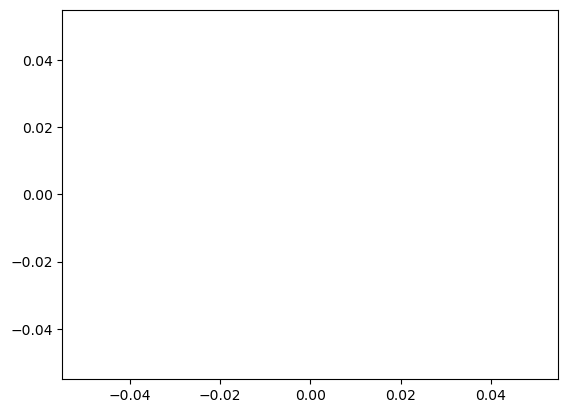

In [67]:
plt.plot(nns, scores)

In [68]:
len(df)

8798

In [69]:
df.shape

(8798, 23)

In [70]:
model = LogisticRegression(max_iter=10000)

In [71]:
model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=10000)

In [72]:
preds = model.predict(Xvalidation)

In [98]:
accuracy_score(preds, ytrain)

0.08610400682011936

In [107]:
import pickle

In [108]:
with open("../output/FINAL/logreg.60.pickle", "rb")as f:
    logreg = pickle.load(f)
with open("../output/FINAL/mm.60.pickle", "rb")as f:
    mm = pickle.load(f)

In [118]:
df_out=  df.assign(pred = logreg.predict(mm.transform(df.drop(columns=["uuid","cancer_type","dataset"]))))

In [120]:
accuracy_score(df_out[df_out.dataset=="Train"].pred, df_out[df_out.dataset=="Train"].cancer_type)

0.08610400682011936

In [123]:
logreg.classes_

array(['bladder', 'brain', 'breast', 'colon', 'corpus_uteri', 'kidney',
       'liver', 'lung', 'ovary', 'pancreas', 'prostate-gland', 'skin',
       'stomach', 'thyroid_gland'], dtype=object)